In [11]:
# 1920*1200の動画からキーの入力情報配列を出力

import cv2
import numpy as np

In [12]:
class Keyboard():
    # どのキーなのかと、そのキーが左、右手どちらで押されているかを管理
    def __init__(self,pos,code) -> None:
        self.pos = np.array(pos)
        # 0は押されていない,1は押されている
        self.rightOn = 0
        self.leftOn = 0
        self.code = code

# とにかく動画を1920*1200にしよう
whiteKeycode = [
    "A0","B0","C1","D1","E1","F1","G1",
    "A1","B1","C2","D2","E2","F2","G2",
    "A2","B2","C3","D3","E3","F3","G3",
    "A3","B3","C4","D4","E4","F4","G4",
    "A4","B4","C5","D5","E5","F5","G5",
    "A5","B5","C6","D6","E6","F6","G6",
    "A6","B6","C7","D7","E7","F7","G7",
    "A7","B7","C8"
]

blackKeycode = [
    "A0#","C1#","D1#","F1#","G1#",
    "A1#","C2#","D2#","F2#","G2#",
    "A2#","C3#","D3#","F3#","G3#",
    "A3#","C4#","D4#","F4#","G4#",
    "A4#","C5#","D5#","F5#","G5#",
    "A5#","C6#","D6#","F6#","G6#",
    "A6#","C7#","D7#","F7#","G7#",
    "A7#"
]

white_search_pos_Xlist1 = np.arange(17, 978, 37)
white_search_pos_Xlist2 = np.arange(978,1940,37)
white_search_pos_Xlist = np.concatenate([white_search_pos_Xlist1, white_search_pos_Xlist2], 0)

black_search_pos_Xlist = np.array([
        # シ,ド,レ,ファ,ソ
         42,  
        105,  152,  216,  257,  300,  
        364,  410,  475,  516,  558,
        623,  668,  733,  774,  816,
        881,  928,  991, 1033, 1075, 
       1139, 1185, 1250, 1291, 1334, 
       1399, 1443, 1508, 1549, 1592,
       1657, 1702, 1766, 1808, 1849])
# -------------------------------------------------------------------------------
# md = 1
white_search_pos_Ylist = np.repeat([1100],len(white_search_pos_Xlist))
white_search_pos_list = np.stack([white_search_pos_Xlist, white_search_pos_Ylist], 1)

whiteKeyList = []
for i,key in enumerate(whiteKeycode):
    whiteKeyList.append(Keyboard(white_search_pos_list[i],key))

black_search_pos_Ylist = np.repeat([1000],len(black_search_pos_Xlist))
black_search_pos_list = np.stack([black_search_pos_Xlist, black_search_pos_Ylist], 1)
black_search_pos_list = np.sort(black_search_pos_list,axis=0)

blackKeyList = []
for i,key in enumerate(blackKeycode):
    blackKeyList.append(Keyboard(black_search_pos_list[i],key))

keyList = np.concatenate([whiteKeyList, blackKeyList], 0)
# ------------------------------------------------------------------------------------


In [46]:
#左手でONになるとき
left = [[7,12],
        [180,230],
        [130,250]]
#右手でONになるとき
right = [[112,120],
         [180,230],
         [130,250]]

In [82]:
leftKeyPushofFrame = [0] * 88
rightKeyPushofFrame = [0] * 88

path = '/Users/yusuke/data/bb.mov'
capture = cv2.VideoCapture(path)

font = cv2.FONT_HERSHEY_SIMPLEX 
display_pos_of_y = 900

b = np.arange(0,36,1)
w = np.arange(0,52,1)

leftKeyPush = []
rightKeyPush = []

# # 動画サイズ取得
width = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
# #フレームレート取得
# fps = capture.get(cv2.CAP_PROP_FPS)


leftlist = []
rightlist = []
nonelist = []

while True:
    # カメラ/動画の画像を1フレーム分取得
    ret, img = capture.read()
    if not ret:
        print("capture error!!")
        break
    img = cv2.resize(img, (1920, 1200))
    imghsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # 右手、左手でキーが押されているかを毎フレームごとに管理する配列
    leftKeyPushofFrame = [0] * 88
    rightKeyPushofFrame = [0] * 88
    
    for i,key in enumerate(keyList):       
        search_posx,search_posy = key.pos
        cv2.circle(img,center=(search_posx,search_posy),radius=0,color=(0,0,255),thickness=3)  
        text = ''
        # 左手 
        if(imghsv[search_posy,search_posx,0] >= left[0][0] and
           imghsv[search_posy,search_posx,0] <= left[0][1] and 
           imghsv[search_posy,search_posx,1] >= left[1][0] and 
           imghsv[search_posy,search_posx,1] <= left[1][1] and 
           imghsv[search_posy,search_posx,2] >= left[2][0] and 
           imghsv[search_posy,search_posx,2] <= left[2][1]):
            text = 'ON'
            key.leftOn = 1
            leftKeyPushofFrame[i] = 1
            leftlist.append([imghsv[search_posy,search_posx,0],imghsv[search_posy,search_posx,1],imghsv[search_posy,search_posx,2]])
            # print(" left  ",imghsv[search_posy,search_posx,0],imghsv[search_posy,search_posx,1],imghsv[search_posy,search_posx,2])
        # 右手がおされている
        elif(imghsv[search_posy,search_posx,0] >= right[0][0] and
           imghsv[search_posy,search_posx,0] <= right[0][1] and 
           imghsv[search_posy,search_posx,1] >= right[1][0] and 
           imghsv[search_posy,search_posx,1] <= right[1][1] and 
           imghsv[search_posy,search_posx,2] >= right[2][0] and 
           imghsv[search_posy,search_posx,2] <= right[2][1]):
            text = 'ON'
            key.rightOn = 1
            rightKeyPushofFrame[i] = 1
            rightlist.append([imghsv[search_posy,search_posx,0],imghsv[search_posy,search_posx,1],imghsv[search_posy,search_posx,2]])
            # print(" right  ",imghsv[search_posy,search_posx,0],imghsv[search_posy,search_posx,1],imghsv[search_posy,search_posx,2])
        # 白鍵も黒鍵もおされていない
        else:
            key.leftOn = 0
            nonelist.append([imghsv[search_posy,search_posx,0],imghsv[search_posy,search_posx,1],imghsv[search_posy,search_posx,2]])
            # print(" none  ",imghsv[search_posy,search_posx,0],imghsv[search_posy,search_posx,1],imghsv[search_posy,search_posx,2])
        
        
        cv2.putText(img,text,(search_posx-20,display_pos_of_y),font,1,(0,255,0),4,cv2.LINE_AA) #フレームに表示
        
    leftKeyPush.append(leftKeyPushofFrame)
    rightKeyPush.append(rightKeyPushofFrame)
            

    cv2.putText(img,text,(search_posx-20,display_pos_of_y),font,1,(0,255,0),4,cv2.LINE_AA) #フレームに表示
    # カメラの映像を表示する
    # cv2.startWindowThread()
    cv2.imshow('camera', img)  

    # qキーを押したら処理を終了する
    # if cv2.waitKey(1) & 0xFF == ord('q'):
    #     break
    if cv2.waitKey(1) == 13: break 
    

# いろいろ閉じる
capture.release()
cv2.waitKey(1)
cv2.destroyAllWindows()
cv2.waitKey(1)


capture error!!


-1

## ヒストグラムかなんかでhsv（左と右となし）を表示しようと思ったけどうまくいかなかったのでやらない

(array([4.70201e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.40000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.61000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        5.30000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.13000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

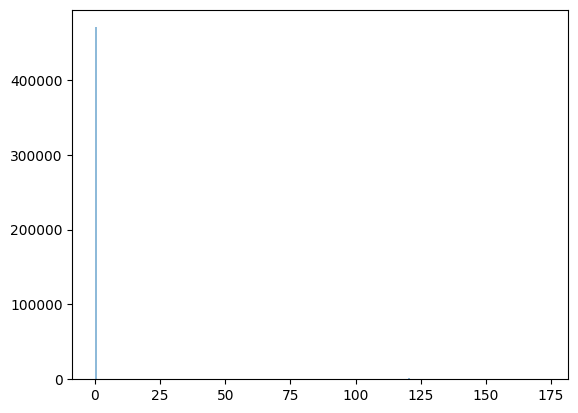

In [79]:
import matplotlib.pyplot as plt
import numpy as np

leftnum = np.repeat(1,len(leftlist))
rightnum = np.repeat(2,len(rightlist))
nonenum = np.repeat(1,len(nonelist))

leftarray = np.array(leftlist)
rightarray = np.array(rightlist)
nonearray = np.array(nonelist)

# plt.hist(leftarray.T[0],alpha = 0.5,label ="left",bins = max(leftarray.T[0])-min(leftarray.T[0]) )
# plt.hist(rightarray.T[0],alpha = 0.5,label ="right",bins = max(rightarray.T[0])-min(rightarray.T[0]))
# plt.hist(nonearray.T[0],alpha = 0.5,label ="none",bins = max(nonearray.T[0])-min(nonearray.T[0]))
# plt.legend(loc="upper left", fontsize=13) # (5)凡例表示

In [80]:
leftarray

array([[ 10, 197, 217],
       [ 10, 197, 217],
       [ 10, 197, 217],
       ...,
       [  9, 197, 172],
       [ 10, 195, 216],
       [  9, 197, 172]], dtype=uint8)

In [45]:
leftKeyPushofFrame = [0] * 88
rightKeyPushofFrame = [0] * 88

path = '/Users/yusuke/data/b.mov'
capture = cv2.VideoCapture(path)

font = cv2.FONT_HERSHEY_SIMPLEX 
display_pos_of_y = 900

b = np.arange(0,36,1)
w = np.arange(0,52,1)

leftKeyPush = []
rightKeyPush = []

# # 動画サイズ取得
width = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
# #フレームレート取得
# fps = capture.get(cv2.CAP_PROP_FPS)


while True:
    # カメラ/動画の画像を1フレーム分取得
    ret, img = capture.read()
    if not ret:
        print("capture error!!")
        break
    img = cv2.resize(img, (1920, 1200))
    imghsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # -------- デバッグ用-----------------------------------------------------------
    # # 白鍵で特定の色になるのはどこかを探す
    # for a in w:
    #     # ①まずこれですべての白鍵の色を出力
    #     print(str(imghsv[whiteKeyList[a].pos[1],whiteKeyList[a].pos[0],0]))
    #     # ②気になる色（下の例では117）があれば、それはどの白鍵ででた色なのかを出力
    #     if(imghsv[whiteKeyList[a].pos[1],whiteKeyList[a].pos[0],0] == 117)：
    #         print(a)
            
    # # 黒鍵で特定の色になるのはどこかを探す
    # for a in b:
    #     # ①まずこれですべての黒鍵の色を出力
    #     print(str(imghsv[blackKeyList[a].pos[1],blackKeyList[a].pos[0],0]))
    #     # ②気になる色（下の例では111）があれば、それはどの黒鍵ででた色なのかを出力
    #     if(imghsv[blackKeyList[a].pos[1],blackKeyList[a].pos[0],0] == 111):
    #         print(a)
    # ------------------------------------------------------------------------------

    # 右手、左手でキーが押されているかを毎フレームごとに管理する配列
    leftKeyPushofFrame = [0] * 88
    rightKeyPushofFrame = [0] * 88
    
    for i,key in enumerate(keyList):       
        search_posx,search_posy = key.pos
        cv2.circle(img,center=(search_posx,search_posy),radius=0,color=(0,0,255),thickness=3)  
        text = ''
        # 左手 
        if(imghsv[search_posy,search_posx,0] in left):
            text = 'ON'
            key.leftOn = 1
            leftKeyPushofFrame[i] = 1
            # print(" left  ",imghsv[search_posy,search_posx,0],imghsv[search_posy,search_posx,1],imghsv[search_posy,search_posx,2])
        # 右手がおされている
        elif(imghsv[search_posy,search_posx,0] in right):
            text = 'ON'
            key.rightOn = 1
            rightKeyPushofFrame[i] = 1
            # print(" right  ",imghsv[search_posy,search_posx,0],imghsv[search_posy,search_posx,1],imghsv[search_posy,search_posx,2])
        # 白鍵も黒鍵もおされていない
        else:
            key.leftOn = 0
            print(" none  ",imghsv[search_posy,search_posx,0],imghsv[search_posy,search_posx,1],imghsv[search_posy,search_posx,2])
        
        
        cv2.putText(img,text,(search_posx-20,display_pos_of_y),font,1,(0,255,0),4,cv2.LINE_AA) #フレームに表示
        
        # -------- デバッグ用-----------------------------------------------------------
        # # 白鍵で特定の位置で特定の値になるときを表示
        # if(imghsv[whiteKeyList[18].pos[1],whiteKeyList[18].pos[0],0] == 113):
        #     cv2.putText(img,text,(search_posx-20,display_pos_of_y),font,1,(0,255,0),4,cv2.LINE_AA) #フレームに表示
        # # 白鍵で特定の位置がONかOFFかを表示
        # if(key.code == "C5"):
        #     cv2.putText(img,str(key.rightOn),(search_posx-20,display_pos_of_y),font,1,(0,255,0),4,cv2.LINE_AA) #フレームに表示
        # ------------------------------------------------------------------------------
    leftKeyPush.append(leftKeyPushofFrame)
    rightKeyPush.append(rightKeyPushofFrame)
            
        # -------- デバッグ用-----------------------------------------------------------
        # # 黒鍵で特定の位置で特定の値になるときを表示
        # if(imghsv[blackKeyList[18].pos[1],blackKeyList[18].pos[0],0] == 113):
        #     cv2.putText(img,text,(search_posx-20,display_pos_of_y),font,1,(0,255,0),4,cv2.LINE_AA) #フレームに表示
        # ------------------------------------------------------------------------------
            
    # 特定の位置に赤丸を表示
    # cv2.circle(img,center=(whiteKeyList[18].pos[0],whiteKeyList[18].pos[1]),radius=4,color=(0,0,255),thickness=3) 
    # cv2.circle(img,center=(blackKeyList[19].pos[0],blackKeyList[19].pos[1]),radius=4,color=(0,0,255),thickness=3) 
    
    
    cv2.putText(img,text,(search_posx-20,display_pos_of_y),font,1,(0,255,0),4,cv2.LINE_AA) #フレームに表示
    # カメラの映像を表示する
    # cv2.startWindowThread()
    cv2.imshow('camera', img)  

    # qキーを押したら処理を終了する
    # if cv2.waitKey(1) & 0xFF == ord('q'):
    #     break
    if cv2.waitKey(1) == 13: break 
    

# いろいろ閉じる
capture.release()
cv2.waitKey(1)
cv2.destroyAllWindows()
cv2.waitKey(1)


 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 169
 none   0 0 168
 none   0 0 169
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 168
 none   0 0 0
 none   0 0 0
 none   0 0 0
 none   0 0 0
 none   0 0 0
 none   0 0 0
 none   0 0 0
 none   0 0 0
 none   0 0 0
 none   0 0 0
 none   0 0 0
 none   0 0 1


-1

## macで実行するときはwaitkeyが大事
## 以前の判定方法はだめだめ

In [84]:
# 前のやつ：hsvの一つ目の値だけしか使わないため、少々エラーが起きる
#左手でONになるとき
left = [7,8,9,10,11,12]
#右手でONになるとき
right = [112,113,114,115,116,117,118,119,120]

leftKeyPushofFrame = [0] * 88
rightKeyPushofFrame = [0] * 88

# ---------------------------------------------------------

# macで画像を表示させるとき
path = '/Users/yusuke/data/obenkyo.png'
capture = cv2.VideoCapture(path)

font = cv2.FONT_HERSHEY_SIMPLEX 
display_pos_of_y = 900

b = np.arange(0,36,1)
w = np.arange(0,52,1)

leftKeyPush = []
rightKeyPush = []

# # 動画サイズ取得
width = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
# #フレームレート取得
# fps = capture.get(cv2.CAP_PROP_FPS)


path = '/Users/yusuke/data/obenkyo.png'
# Load an color image in grayscale
img = cv2.imread(path)

imghsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

for i,key in enumerate(keyList):       
    search_posx,search_posy = key.pos
    cv2.circle(img,center=(search_posx,search_posy),radius=0,color=(0,0,255),thickness=3)  
    text = ''
    # 左手 
    if(imghsv[search_posy,search_posx,0] in left):
        text = 'ON'
        key.leftOn = 1
        leftKeyPushofFrame[i] = 1
    # 白鍵も黒鍵もおされていない
    else:
        key.leftOn = 0
    
    # 右手がおされている
    if(imghsv[search_posy,search_posx,0] in right):
        text = 'ON'
        key.rightOn = 1
        rightKeyPushofFrame[i] = 1
    # 押されていない
    else: 
        key.rightOn = 0
    
    
    # print(text,imghsv[search_posy,search_posx])
    
    cv2.putText(img,text,(search_posx-20,display_pos_of_y),font,1,(0,255,0),4,cv2.LINE_AA) #フレームに表示

cv2.imshow("image",imghsv)
cv2.imshow("image",img)
# このwaitkey(1)で画像を表示させている（これがないと永遠にぐるぐるになっちゃう）
cv2.waitKey(1)


-1

In [86]:
# んでかならずこのコードを実行して画像を消さないといけないが、これもwaitkeyが必要
cv2.destroyAllWindows()
cv2.waitKey(1)

-1